In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import seaborn as sns
import statsmodels.api as sm 

In [2]:
data=pd.read_csv('salary_data.csv')#read the file 
data.head()#gives the head shot of the data

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


In [3]:
data.info()# gives the information of the data whether it contains null values and type of data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 608.0 bytes


In [4]:
data.describe()# gives the summary of the data 

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [5]:
data.corr()# inorder to find the correlation between the two variables 

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


C:\Users\ELCOT\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='YearsExperience', ylabel='Salary'>

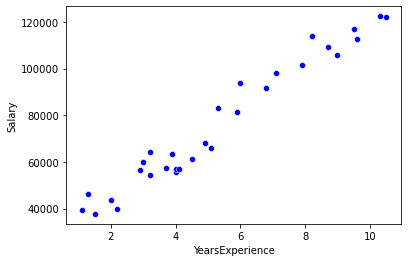

In [6]:
sns.scatterplot(data.YearsExperience,data.Salary,color='b')# ploting the linear relationship between the two variables 

# here to find the outlier in the data set we are using the boxplot

<function matplotlib.pyplot.show(close=None, block=None)>

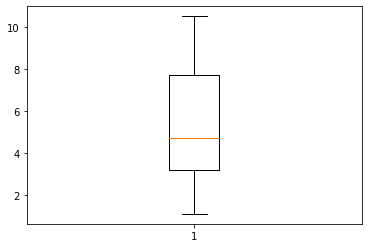

In [7]:
plt.boxplot(data.YearsExperience)# inorder to find the outlier here i am using the boxplot
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

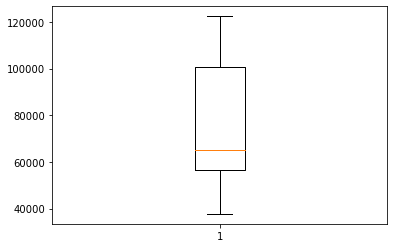

In [8]:
plt.boxplot(data.Salary)#inorder to find the outlier here i am using the boxplot
plt.show

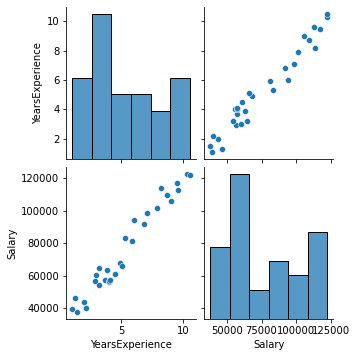

In [9]:
sns.pairplot(data)

# developing the model1

In [11]:
model1=smf.ols("Salary~YearsExperience",data=data).fit()

In [12]:
model1.params

Intercept          25792.200199
YearsExperience     9449.962321
dtype: float64

In [13]:
model1.summary() # gives the summary of the model that has developed

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Tue, 23 Feb 2021   Prob (F-statistic):           1.14e-20
Time:                        15:25:50   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        2.579e+04   2273.053     11.347      0.000    2.11e+04    3.04e+04
YearsExperience  9449.9623    378.755     24.950      0.000    8674.119    1.02e+04
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [14]:
model1.resid.head()

0    3155.841248
1    8127.848783
2   -2236.143681
3   -1167.124842
4   -6691.117306
dtype: float64

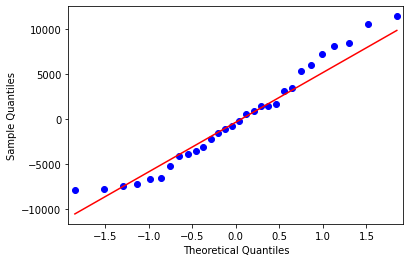

In [15]:
qqplot1=sm.qqplot(model1.resid,line='q')

In [16]:
predict1=model1.predict()
predict1

array([ 36187.15875227,  38077.15121656,  39967.14368085,  44692.12484158,
        46582.11730587,  53197.09093089,  54142.08716303,  56032.07962732,
        56032.07962732,  60757.06078805,  62647.05325234,  63592.04948449,
        63592.04948449,  64537.04571663,  68317.03064522,  72097.0155738 ,
        73987.00803809,  75877.00050238,  81546.97789525,  82491.9741274 ,
        90051.94398456,  92886.932681  , 100446.90253816, 103281.8912346 ,
       108006.87239533, 110841.86109176, 115566.84225249, 116511.83848464,
       123126.81210966, 125016.80457395])

In [19]:
rmse1=np.sqrt(np.mean((np.array([data.Salary])-np.array(predict1))**2))
rmse1

5592.043608760662

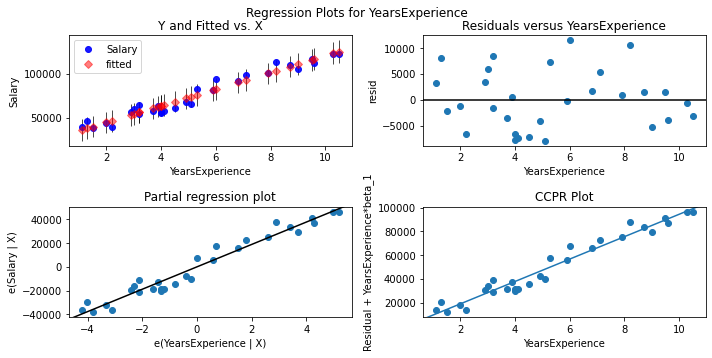

In [20]:
fig = plt.figure(figsize=(10,5))
fig = sm.graphics.plot_regress_exog(model1,"YearsExperience", fig=fig)
plt.show()

C:\Users\ELCOT\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


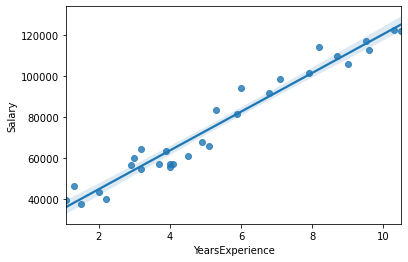

In [19]:
sns.regplot(data.YearsExperience,data.Salary,'r')
plt.show()

# developing the another model2

In [22]:
model2=smf.ols('Salary~np.log(YearsExperience)',data=data).fit()

In [23]:
model2.params

Intercept                  14927.97177
np.log(YearsExperience)    40581.98796
dtype: float64

In [24]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.854
Model:                            OLS   Adj. R-squared:                  0.849
Method:                 Least Squares   F-statistic:                     163.6
Date:                Tue, 23 Feb 2021   Prob (F-statistic):           3.25e-13
Time:                        15:32:15   Log-Likelihood:                -319.77
No. Observations:                  30   AIC:                             643.5
Df Residuals:                      28   BIC:                             646.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                1.493e+04   5156.226      2.895      0.007    4365.921    2.55e+04
np.log(YearsExperience)  4.058e+04   3172.453     12.792      0.000    3.41e+04    4.71e+04
==============================================================================
Omnibus:                        1.094   Durbin-Watson:                   0.512
Prob(Omnibus):                  0.579   Jarque-Bera (JB):                0.908
Skew:                           0.156   Prob(JB):                        0.635
Kurtosis:                       2.207   Cond. No.                         5.76
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [25]:
predict2=model2.predict()
predict2

array([ 18795.84833932,  25575.23519175,  31382.55190541,  43057.2623059 ,
        46925.13887516,  58136.05007933,  59511.84244125,  62130.943929  ,
        62130.943929  ,  68022.71850448,  70159.10586295,  71186.55284173,
        71186.55284173,  72188.62814857,  75966.42257661,  79422.29572936,
        81045.79173698,  82606.82988239,  86959.06670394,  87641.13297709,
        92720.50213746,  94472.51469629,  98805.37138951, 100317.91868441,
       102719.92075053, 104095.71311245, 106289.86843506, 106714.81460019,
       109571.00724698, 110351.45414519])

In [26]:
rmse2=np.sqrt(np.mean((np.array([data.Salary])-np.array(predict2))**2))
rmse2

10302.893706228304

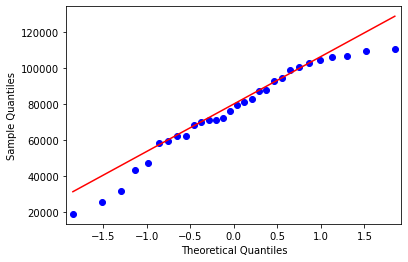

In [30]:
qqplot2=sm.qqplot(predict2,line='q')

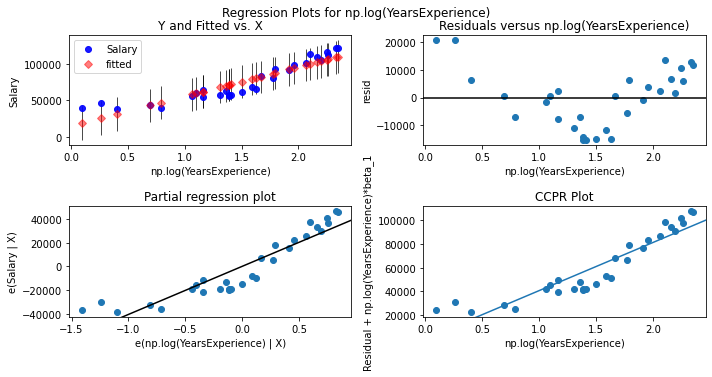

In [31]:
fig = plt.figure(figsize=(10,5))
fig = sm.graphics.plot_regress_exog(model2,"np.log(YearsExperience)", fig=fig)
plt.show()

In [32]:
data1=data
data1['yearsexperience_sq']=data.YearsExperience*data.YearsExperience
data1.head()

,YearsExperience,Salary,yearsexperience_sq
0,1.1,39343,1.21
1,1.3,46205,1.69
2,1.5,37731,2.25
3,2.0,43525,4.00
4,2.2,39891,4.84


In [33]:
model4=smf.ols('np.log(Salary)~YearsExperience+yearsexperience_sq',data=data1).fit()


In [34]:
model4.params

Intercept             10.336852
YearsExperience        0.202382
yearsexperience_sq    -0.006614
dtype: float64

In [37]:
model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         np.log(Salary)   R-squared:                       0.949
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     249.2
Date:                Tue, 23 Feb 2021   Prob (F-statistic):           3.95e-18
Time:                        15:39:52   Log-Likelihood:                 32.391
No. Observations:                  30   AIC:                            -58.78
Df Residuals:                      27   BIC:                            -54.58
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             10.3369      0.067    154.368      0.000      10.199      10.474
YearsExperience        0.2024      0.027      7.601      0.000       0.148       0.257
yearsexperience_sq    -0.0066      0.002     -2.957      0.006      -0.011      -0.002
==============================================================================
Omnibus:                        1.099   Durbin-Watson:                   1.845
Prob(Omnibus):                  0.577   Jarque-Bera (JB):                1.002
Skew:                           0.260   Prob(JB):                        0.606
Kurtosis:                       2.271   Cond. No.                         223.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

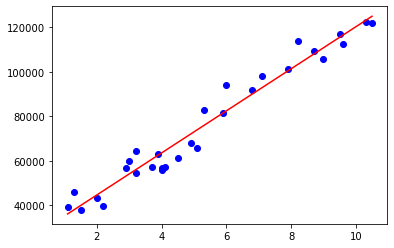

In [39]:
plt.scatter(data1.YearsExperience,data.Salary,c='b')
plt.plot(data1.YearsExperience,predict1,'r')

In [41]:
newdata=pd.DataFrame({'YearsExperience':float(input('enter the years of experience'))},index=[1])

enter the years of experience5


In [42]:
predictedsalary=model1.predict(newdata)
predictedsalary

1    73042.011806
dtype: float64